<a href="https://colab.research.google.com/github/Kimsumin1234/data_analysis/blob/main/10_%ED%94%84%EB%A0%8C%EC%B0%A8%EC%9D%B4%EC%A6%88_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 9. 상권분석 에서 csv 파일을 가져옴

In [1]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 13.5 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 한글 폰트 설정
import koreanize_matplotlib

import warnings
warnings.simplefilter(action='ignore')

### 1. 데이터 로드

In [4]:
df_store = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/data/seoul_open_store.csv')
df_store.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,영자's곱창,음식,한식,곱창 전골/구이,서울특별시,광진구,중곡3동,중곡동,서울특별시 광진구 면목로 172,127.082832,37.568503
1,호텔클로이,숙박,일반 숙박,여관/모텔,서울특별시,중구,광희동,광희동1가,서울특별시 중구 을지로42길 11,127.005849,37.565708
2,나라차중계태권도장,교육,기타 교육,태권도/무술학원,서울특별시,노원구,중계본동,중계동,서울특별시 노원구 한글비석로 242,127.076956,37.649226
3,이상한스냅,과학·기술,사진 촬영,사진촬영업,서울특별시,양천구,신월5동,신월동,서울특별시 양천구 월정로 283,126.828832,37.542117
4,토끼정,음식,한식,백반/한정식,서울특별시,강서구,가양1동,마곡동,서울특별시 강서구 마곡동로 55,126.833022,37.560053


In [5]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475236 entries, 0 to 475235
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       475236 non-null  object 
 1   상권업종대분류명  475236 non-null  object 
 2   상권업종중분류명  475236 non-null  object 
 3   상권업종소분류명  475236 non-null  object 
 4   시도명       475236 non-null  object 
 5   시군구명      475236 non-null  object 
 6   행정동명      475236 non-null  object 
 7   법정동명      475236 non-null  object 
 8   도로명주소     475236 non-null  object 
 9   경도        475236 non-null  float64
 10  위도        475236 non-null  float64
dtypes: float64(2), object(9)
memory usage: 39.9+ MB


In [6]:
# 서울 구 확인

df_store['시군구명'].unique()

array(['광진구', '중구', '노원구', '양천구', '강서구', '송파구', '구로구', '강남구', '영등포구',
       '금천구', '마포구', '성동구', '중랑구', '서초구', '동작구', '은평구', '동대문구', '서대문구',
       '도봉구', '종로구', '관악구', '성북구', '강동구', '용산구', '강북구'], dtype=object)

In [7]:
df_store['시군구명'].nunique()

25

### 베스킨라빈스, 던킨도너츠 위치 분석

In [16]:
# 베스킨라빈스 가 어떻게 들어있는지 확인해보기

# df_store[df_store['상호명'].str.contains('베스킨|배스킨|baskinro|Baskinro')]
df_store[df_store['상호명'].str.contains('베스킨|배스킨')]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
1970,비알배스킨라빈스한남HIVE,음식,기타 간이,아이스크림/빙수,서울특별시,용산구,한남동,한남동,서울특별시 용산구 독서당로 93,127.010579,37.535004
4826,비알배스킨라빈스동부이촌점,음식,기타 간이,아이스크림/빙수,서울특별시,용산구,이촌1동,이촌동,서울특별시 용산구 이촌로 260,126.976135,37.518537
8942,배스킨라빈스상계역점,음식,기타 간이,아이스크림/빙수,서울특별시,노원구,중계4동,중계동,서울특별시 노원구 한글비석로 384,127.073221,37.659802
9497,배스킨라빈스길동역점,음식,기타 간이,아이스크림/빙수,서울특별시,강동구,길동,길동,서울특별시 강동구 양재대로 1471,127.139247,37.537355
9808,비알배스킨라빈스서울대병원,음식,기타 간이,아이스크림/빙수,서울특별시,종로구,이화동,연건동,서울특별시 종로구 대학로 101,126.997184,37.580448
...,...,...,...,...,...,...,...,...,...,...,...
465005,비알배스킨라빈스WORKSHOP,음식,기타 간이,아이스크림/빙수,서울특별시,강남구,도곡1동,도곡동,서울특별시 강남구 논현로 201,127.040886,37.485894
465455,배스킨라빈스영등포,음식,기타 간이,아이스크림/빙수,서울특별시,영등포구,당산1동,당산동1가,서울특별시 영등포구 당산로 104,126.896396,37.523864
468834,배스킨라빈스목동서로점,음식,기타 간이,아이스크림/빙수,서울특별시,양천구,목1동,목동,서울특별시 양천구 목동서로 250,126.869330,37.524960
472939,배스킨라빈스용마산역점,음식,기타 간이,아이스크림/빙수,서울특별시,중랑구,면목4동,면목동,서울특별시 중랑구 면목로 243,127.085008,37.574773


In [21]:
# 던킨도너츠 가 어떻게 들어있는지 확인해보기

# df_store[df_store['상호명'].str.contains('던킨|dunkin|Dunkin|DUNKIN')]
df_store[df_store['상호명'].str.contains('던킨')]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
15262,비알던킨도너츠신림양지병원,음식,기타 간이,빵/도넛,서울특별시,관악구,서원동,신림동,서울특별시 관악구 남부순환로 1640,126.932878,37.484301
21970,던킨도너츠동대문,음식,기타 간이,빵/도넛,서울특별시,종로구,종로5.6가동,종로6가,서울특별시 종로구 종로 266,127.007311,37.570694
23189,던킨도너츠목동남로점,음식,기타 간이,빵/도넛,서울특별시,구로구,고척2동,고척동,서울특별시 구로구 목동남로 6,126.860760,37.506713
26585,던킨도너츠,음식,기타 간이,빵/도넛,서울특별시,광진구,구의1동,구의동,서울특별시 광진구 자양로 116,127.083736,37.538189
27547,던킨현대아이파크,음식,기타 간이,빵/도넛,서울특별시,강남구,삼성1동,삼성동,서울특별시 강남구 영동대로 520,127.061119,37.513629
...,...,...,...,...,...,...,...,...,...,...,...
446071,던킨,음식,기타 간이,피자,서울특별시,송파구,문정2동,문정동,서울특별시 송파구 충민로 66,127.124941,37.477608
449593,던킨양재하나로점,음식,기타 간이,빵/도넛,서울특별시,서초구,양재2동,양재동,서울특별시 서초구 청계산로 10,127.043516,37.463218
452654,던킨송파,음식,기타 간이,빵/도넛,서울특별시,송파구,오금동,오금동,서울특별시 송파구 마천로7길 5,127.127735,37.508589
454626,던킨NC신구로,음식,기타 간이,빵/도넛,서울특별시,구로구,구로5동,구로동,서울특별시 구로구 구로중앙로 152,126.882412,37.501144


In [59]:
df_franchise = df_store[df_store['상호명'].str.contains('베스킨|배스킨|던킨')].copy()
df_franchise.shape

(399, 11)

In [60]:
df_franchise.sample(10)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
343625,던킨도너츠,음식,기타 간이,빵/도넛,서울특별시,강남구,청담동,청담동,서울특별시 강남구 도산대로89길 9,127.050507,37.525303
279690,배스킨라빈스목동,음식,기타 간이,아이스크림/빙수,서울특별시,양천구,목1동,목동,서울특별시 양천구 오목로 299,126.870342,37.526078
11947,배스킨라빈스여의KBS별관점,음식,기타 간이,아이스크림/빙수,서울특별시,영등포구,여의동,여의도동,서울특별시 영등포구 여의대방로 383,126.931485,37.519330
183307,던킨,음식,기타 간이,빵/도넛,서울특별시,양천구,신정6동,신정동,서울특별시 양천구 목동서로 349,126.865292,37.517398
260972,배스킨라빈스,음식,기타 간이,아이스크림/빙수,서울특별시,양천구,신정1동,신정동,서울특별시 양천구 중앙로 262,126.853389,37.519833
182906,던킨신정뉴타운점,음식,기타 간이,빵/도넛,서울특별시,양천구,신정4동,신정동,서울특별시 양천구 신월로 289,126.852934,37.521414
113122,배스킨라빈스마포성산점,음식,기타 간이,아이스크림/빙수,서울특별시,마포구,성산2동,성산동,서울특별시 마포구 월드컵북로 189,126.907471,37.568037
253339,던킨도너츠응암역점,음식,기타 간이,빵/도넛,서울특별시,은평구,응암1동,응암동,서울특별시 은평구 은평로 85,126.917338,37.599592
236587,베스킨라빈스,음식,기타 간이,아이스크림/빙수,서울특별시,은평구,갈현2동,갈현동,서울특별시 은평구 서오릉로 150,126.916547,37.611938
266992,베스킨라빈스,음식,기타 간이,아이스크림/빙수,서울특별시,금천구,독산1동,독산동,서울특별시 금천구 시흥대로 391,126.896869,37.468653


In [61]:
# 브랜드명 이라는 새로운 컬럼을 만들기
# 베스킨,배스킨 ~ => 베스킨라빈스 , 던킨~ => 던킨
# df_franchise.loc[조건,'새로운 컬럼명'] = '입력할 값'

df_franchise.loc[df_franchise['상호명'].str.contains('베스킨|배스킨'),'브랜드명'] = '베스킨라빈스'


In [62]:
# df_franchise.loc[df_franchise['상호명'].str.contains('던킨'),'브랜드명'] = '던킨'

df_franchise.loc[df_franchise['브랜드명'].isnull()]
df_franchise['브랜드명'] = df_franchise['브랜드명'].fillna('던킨')

In [63]:
df_franchise[['상호명','브랜드명']].sample(20)

,상호명,브랜드명
358843,베스킨라빈스,베스킨라빈스
261266,배스킨라빈스,베스킨라빈스
327839,배스킨라빈스구로,베스킨라빈스
356620,베스킨라빈스양재매헌점,베스킨라빈스
33509,비알배스킨라빈스대학로,베스킨라빈스
239024,배스킨라빈스,베스킨라빈스
30344,배스킨라빈스/던킨흑석DT점,던킨
202933,베스킨라빈스31만리,베스킨라빈스
142529,베스킨라빈스,베스킨라빈스
30354,배스킨라빈스,베스킨라빈스


In [64]:
df_franchise['브랜드명'].value_counts()

브랜드명
베스킨라빈스    292
던킨        107
Name: count, dtype: int64

In [65]:
# 베스킨 이랑 던킨은 음식인데 소매 랑 숙박인 대가 있다 이거를 확인후 제거해야함

df_franchise['상권업종대분류명'].value_counts()

상권업종대분류명
음식    395
소매      3
숙박      1
Name: count, dtype: int64

In [69]:
# 소매, 숙박 찾기

# df_franchise[(df_franchise['상권업종대분류명']=='숙박')|(df_franchise['상권업종대분류명']=='소매')]
df_franchise[df_franchise['상권업종대분류명'].isin(['소매','숙박'])]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,브랜드명
13388,배스킨,소매,가전·통신 소매,핸드폰 소매업,서울특별시,구로구,구로5동,구로동,서울특별시 구로구 새말로 97,126.890208,37.507038,베스킨라빈스
55073,던킨금천,소매,가전·통신 소매,핸드폰 소매업,서울특별시,금천구,독산2동,독산동,서울특별시 금천구 독산로 203,126.902280,37.465009,던킨
416213,와이씨앤티_던킨,숙박,일반 숙박,호텔/리조트,서울특별시,구로구,구로3동,구로동,서울특별시 구로구 디지털로32길 72,126.898837,37.483178,던킨
417187,한국방송통신대학교소비자생활협동조합던킨,소매,종합 소매,그 외 기타 종합 소매업,서울특별시,종로구,이화동,동숭동,서울특별시 종로구 대학로 86,127.003269,37.579184,던킨


In [75]:
# 제거하기

df_franchise = df_franchise[~(df_franchise['상권업종대분류명'].isin(['소매','숙박']))].copy()

In [76]:
df_franchise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395 entries, 1970 to 473837
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   상호명       395 non-null    object 
 1   상권업종대분류명  395 non-null    object 
 2   상권업종중분류명  395 non-null    object 
 3   상권업종소분류명  395 non-null    object 
 4   시도명       395 non-null    object 
 5   시군구명      395 non-null    object 
 6   행정동명      395 non-null    object 
 7   법정동명      395 non-null    object 
 8   도로명주소     395 non-null    object 
 9   경도        395 non-null    float64
 10  위도        395 non-null    float64
 11  브랜드명      395 non-null    object 
dtypes: float64(2), object(10)
memory usage: 40.1+ KB


In [77]:
df_franchise['브랜드명'].value_counts()

브랜드명
베스킨라빈스    291
던킨        104
Name: count, dtype: int64

In [78]:
# value_counts(normalize=True) : 빈도수 비율

df_franchise['브랜드명'].value_counts(normalize=True)

브랜드명
베스킨라빈스    0.736709
던킨        0.263291
Name: proportion, dtype: float64

<Axes: ylabel='브랜드명'>

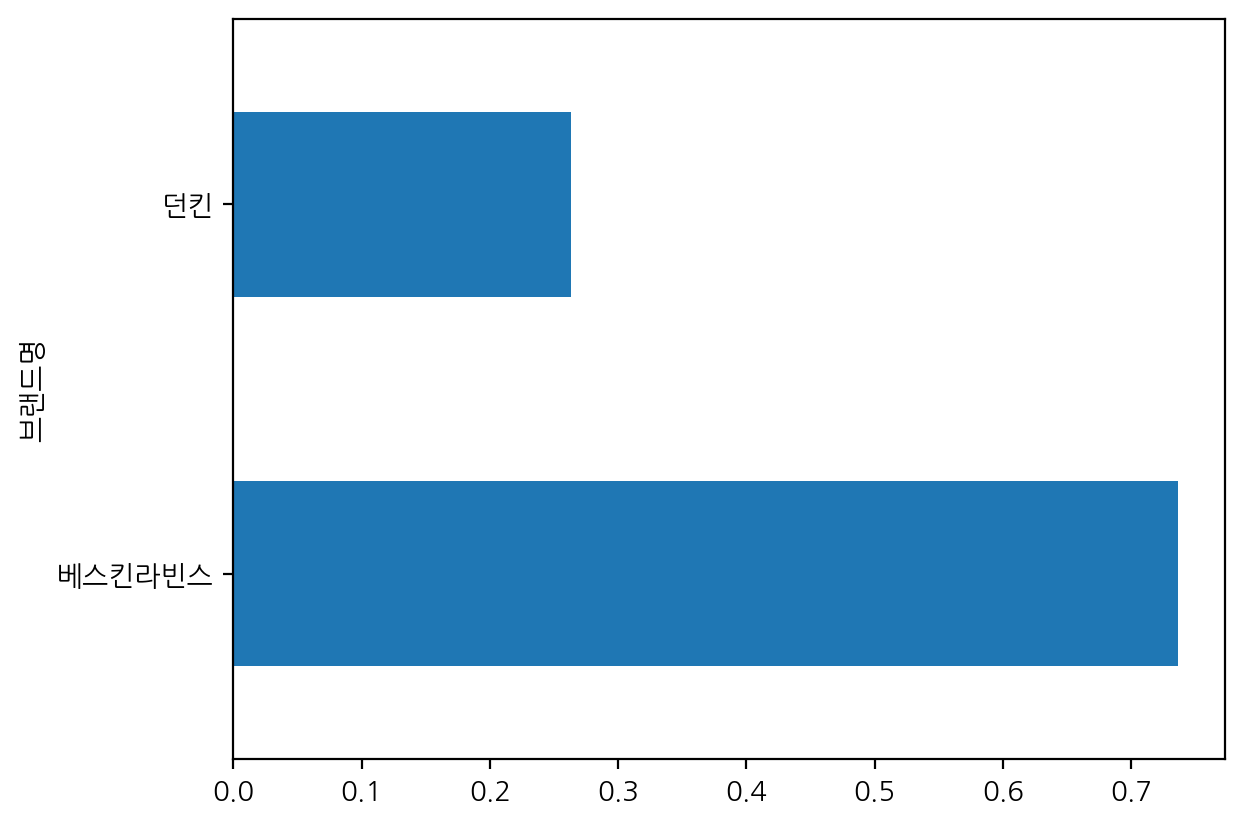

In [82]:
# pandas 로 차트 그리기

# df_franchise['브랜드명'].value_counts().plot.bar(rot=0)
# df_franchise['브랜드명'].value_counts().plot.barh()
df_franchise['브랜드명'].value_counts(normalize=True).plot.barh()

<Axes: xlabel='브랜드명', ylabel='count'>

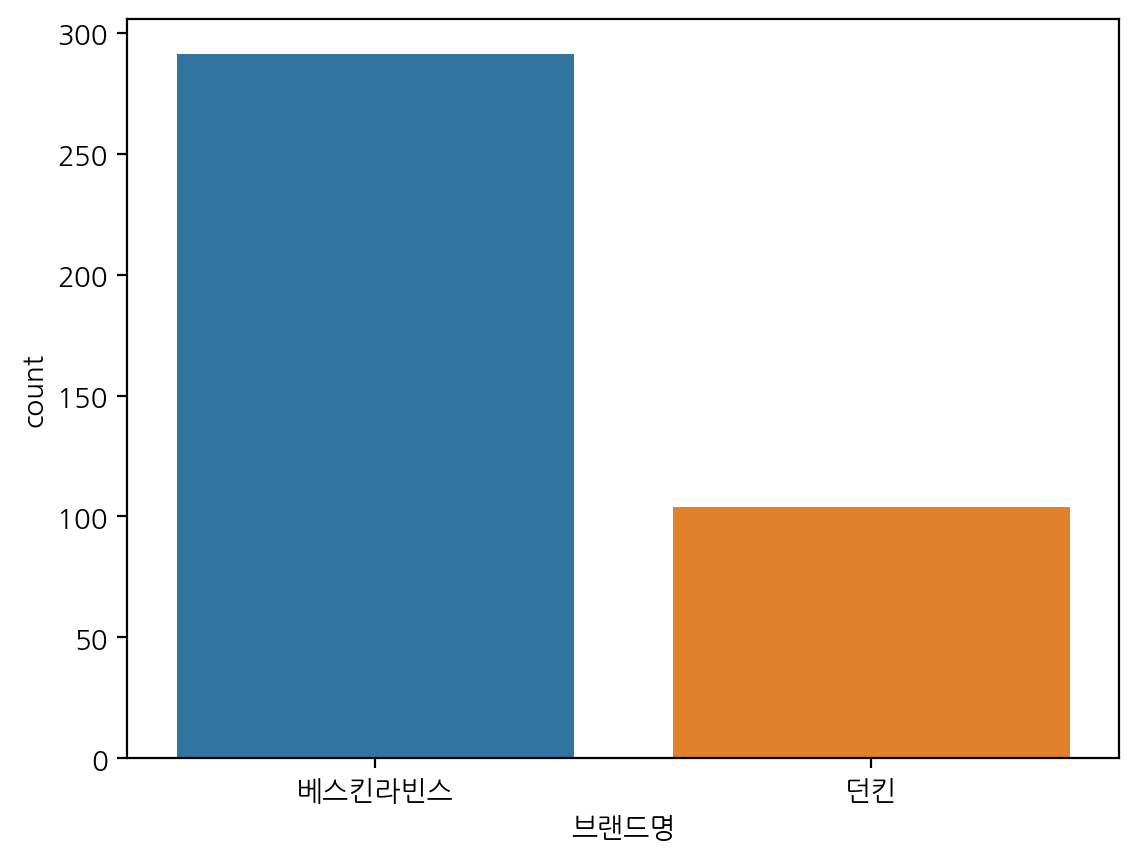

In [83]:
# 위 작업을 seaborn 으로 시각화를 한다면 value_counts() 를 이용하지 않고 countplot() 을 사용하면 된다

sns.countplot(df_franchise, x='브랜드명', hue='브랜드명')

<Axes: xlabel='브랜드명', ylabel='count'>

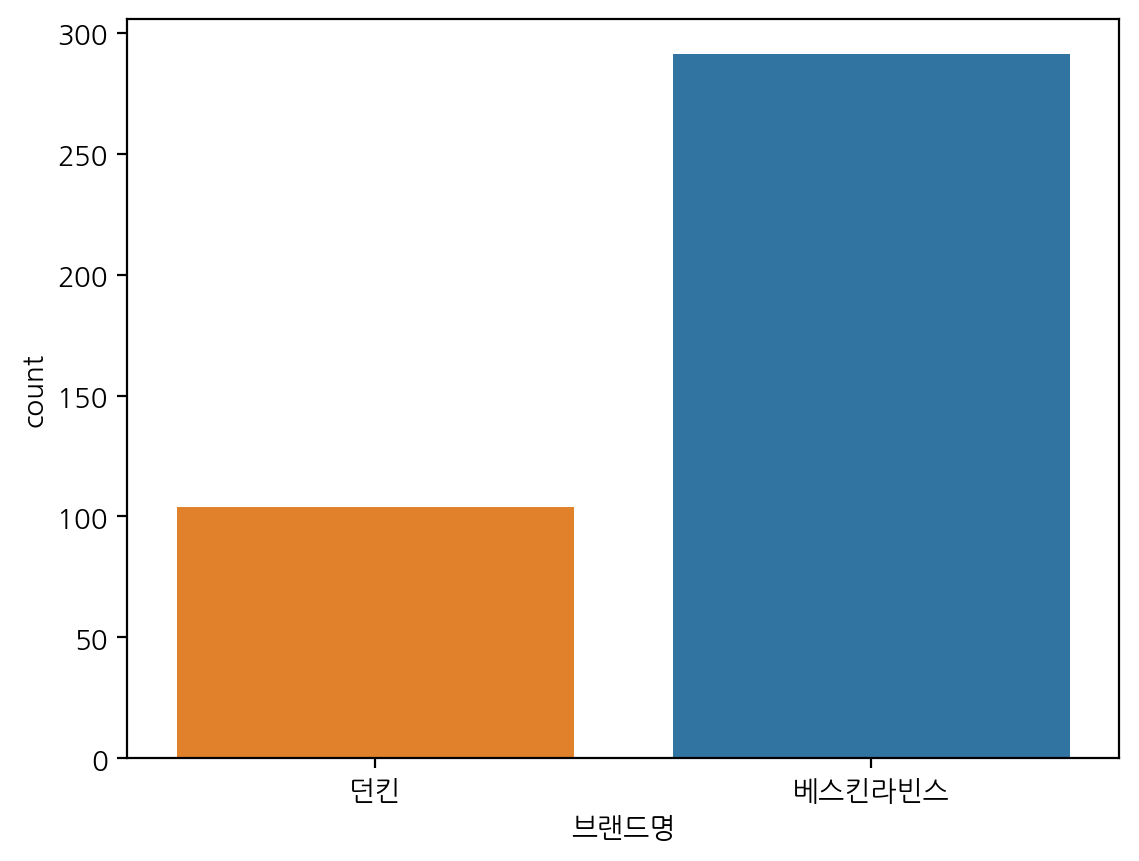

In [84]:
sns.countplot(df_franchise, x='브랜드명', hue='브랜드명', order=df_franchise['브랜드명'].sort_values())

In [86]:
brand_count = df_franchise['브랜드명'].value_counts()
brand_count.index

Index(['베스킨라빈스', '던킨'], dtype='object', name='브랜드명')

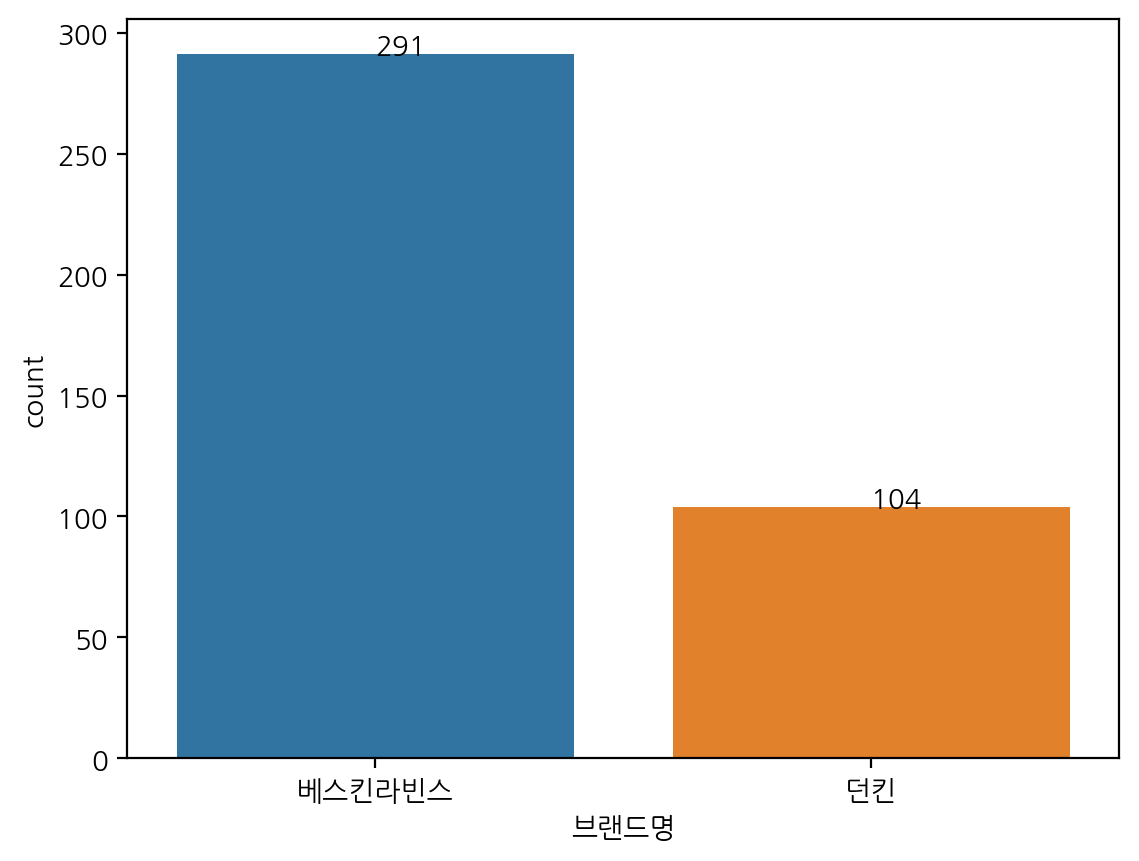

In [88]:
g = sns.countplot(df_franchise, x='브랜드명', hue='브랜드명')

for i, val in enumerate(brand_count.index):
  g.text(x=i, y=brand_count[i], s=brand_count[i])

<Axes: xlabel='시군구명', ylabel='count'>

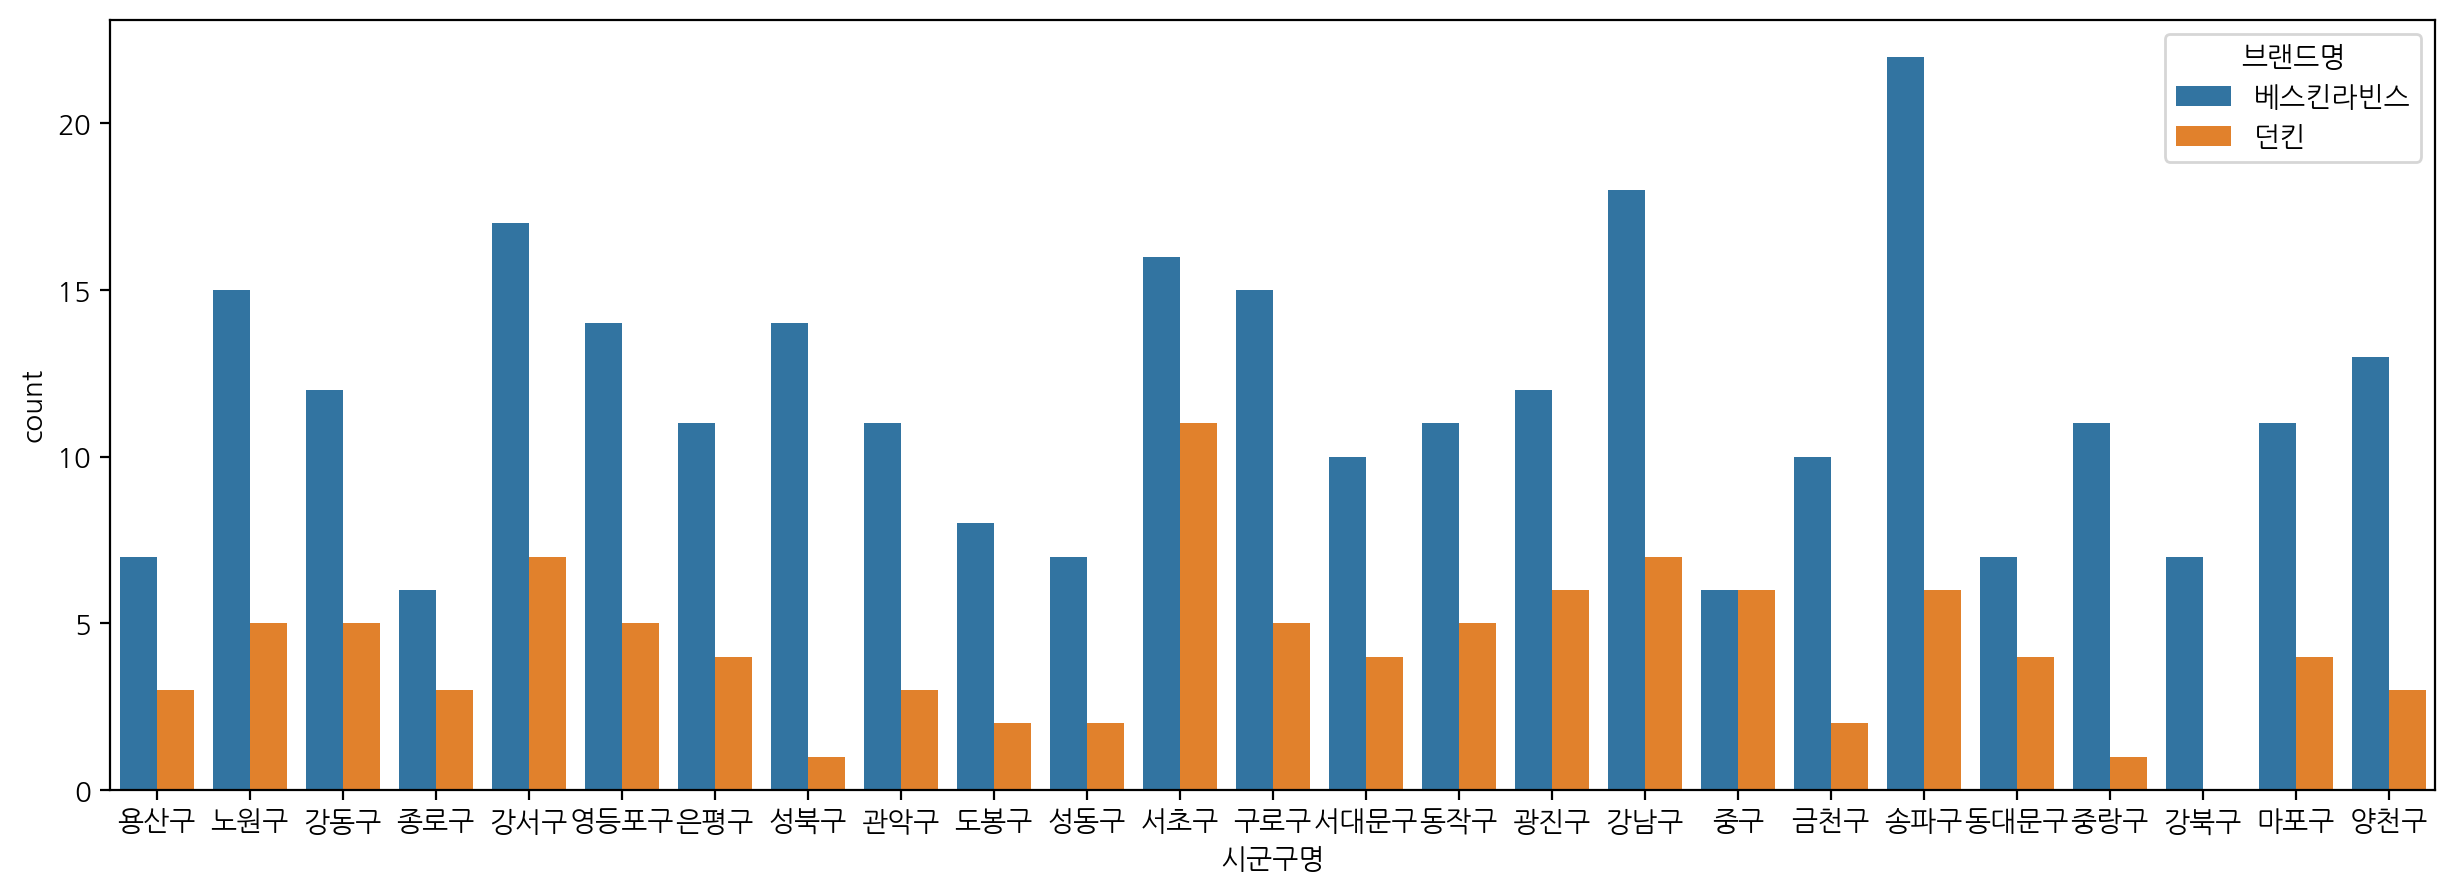

In [92]:
# x='시군구명'

plt.figure(figsize=(15,5))
sns.countplot(df_franchise, x='시군구명', hue='브랜드명')

<Axes: xlabel='경도', ylabel='위도'>

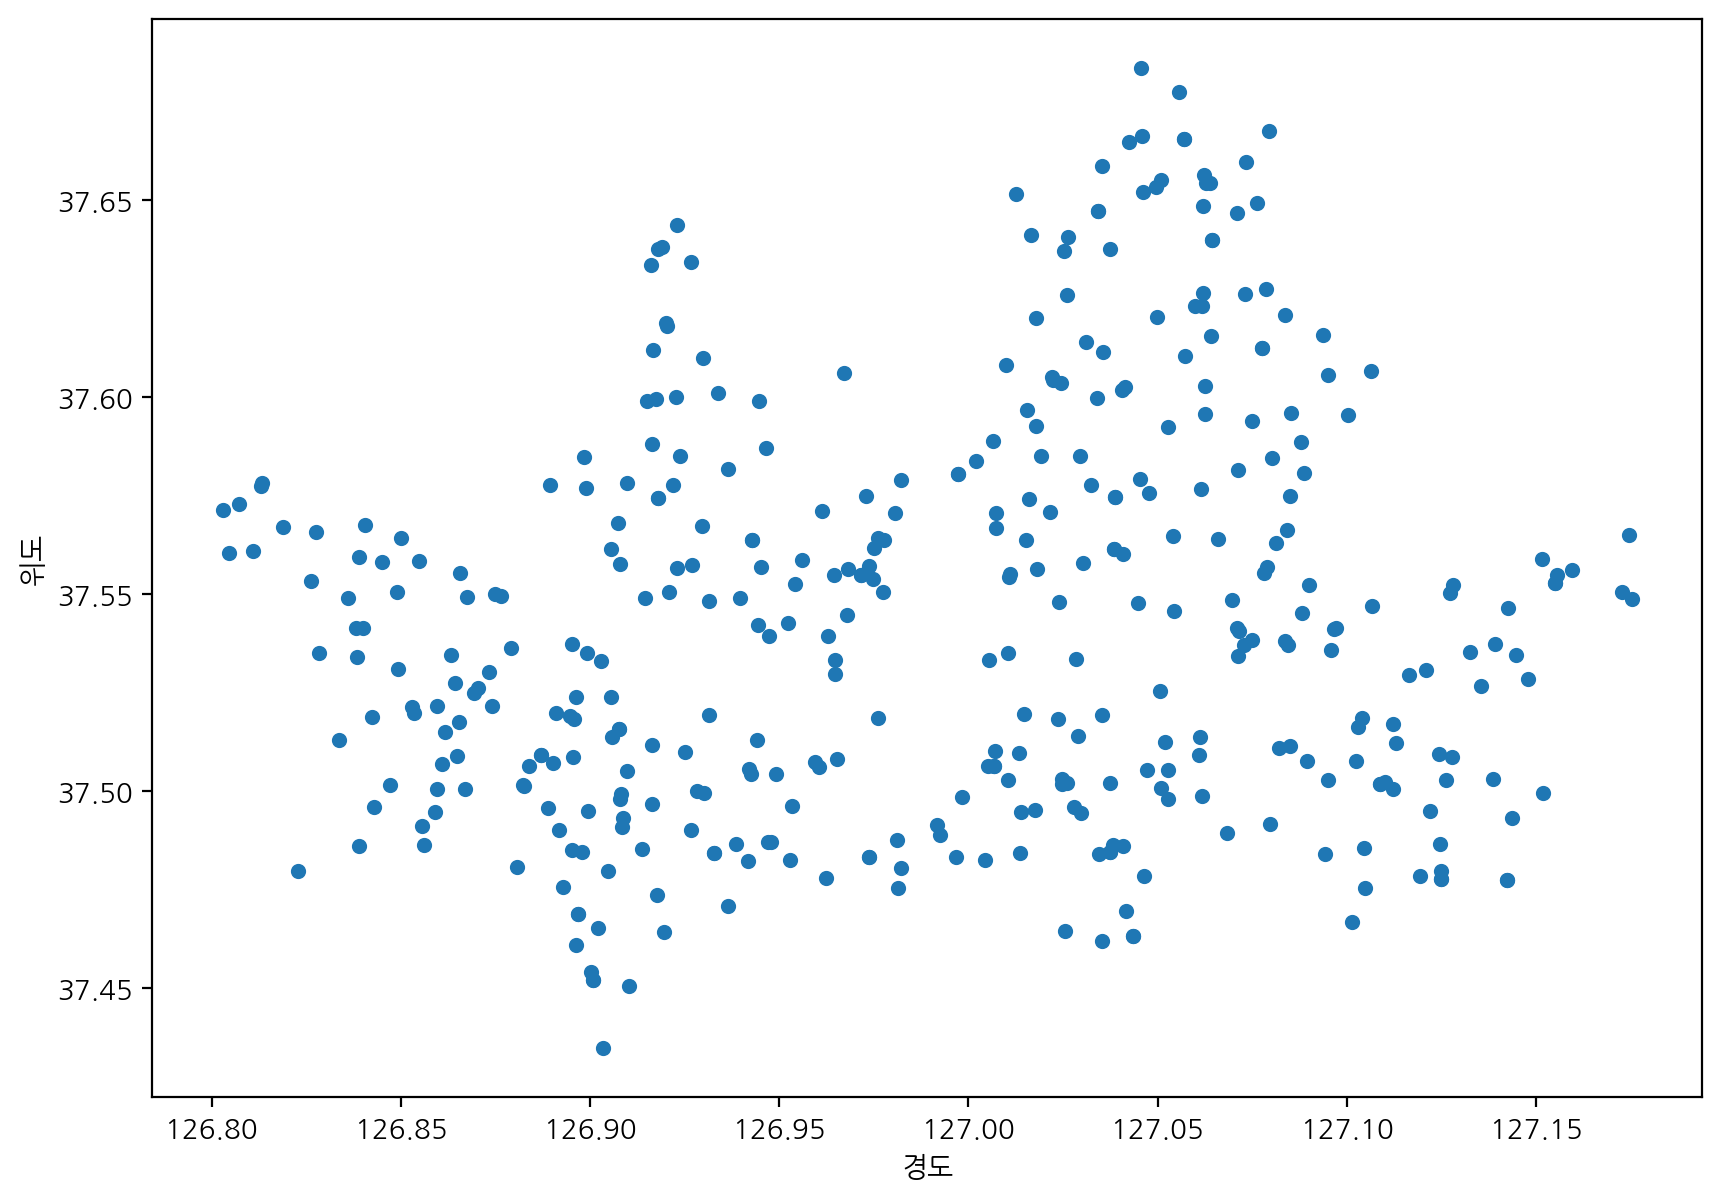

In [93]:
df_franchise[['위도','경도']].plot.scatter(x='경도',y='위도',figsize=(10,7))

<Axes: xlabel='경도', ylabel='위도'>

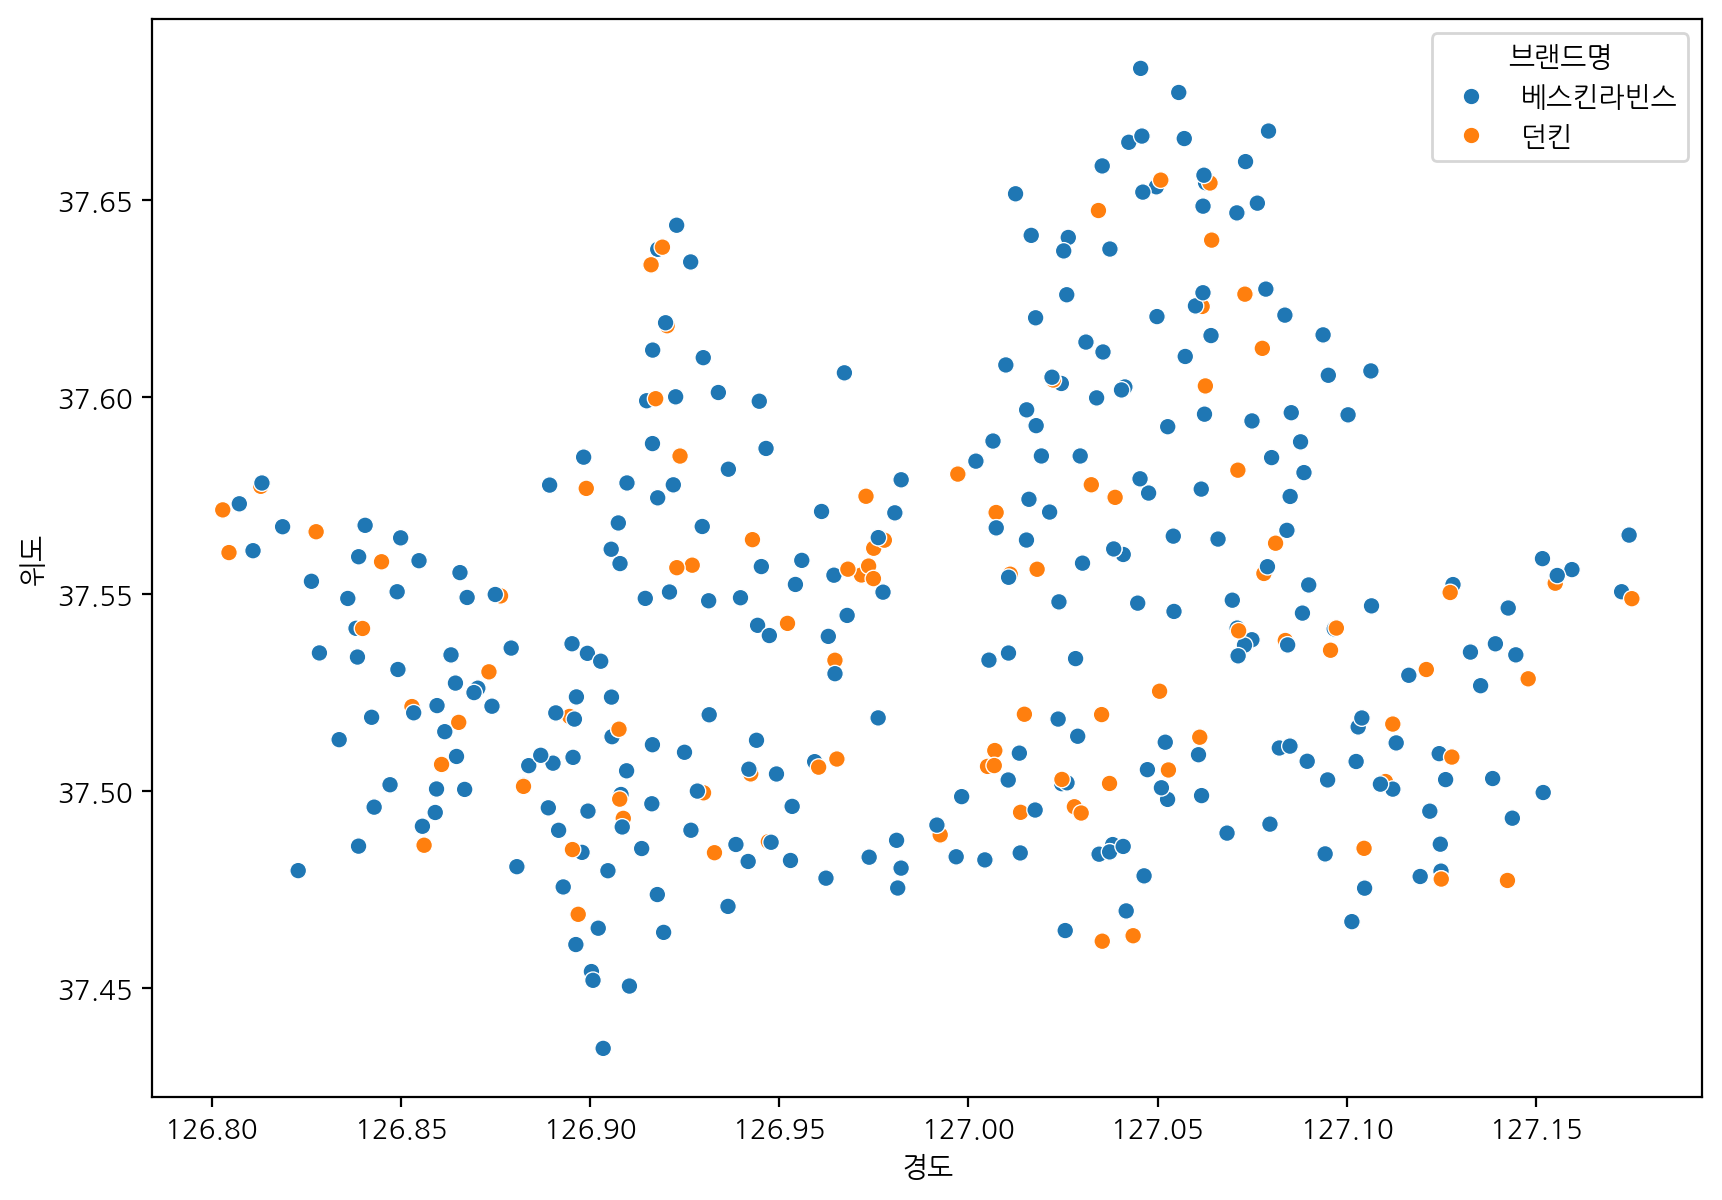

In [96]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_franchise,x='경도',y='위도',hue='브랜드명')

<Figure size 1000x700 with 0 Axes>

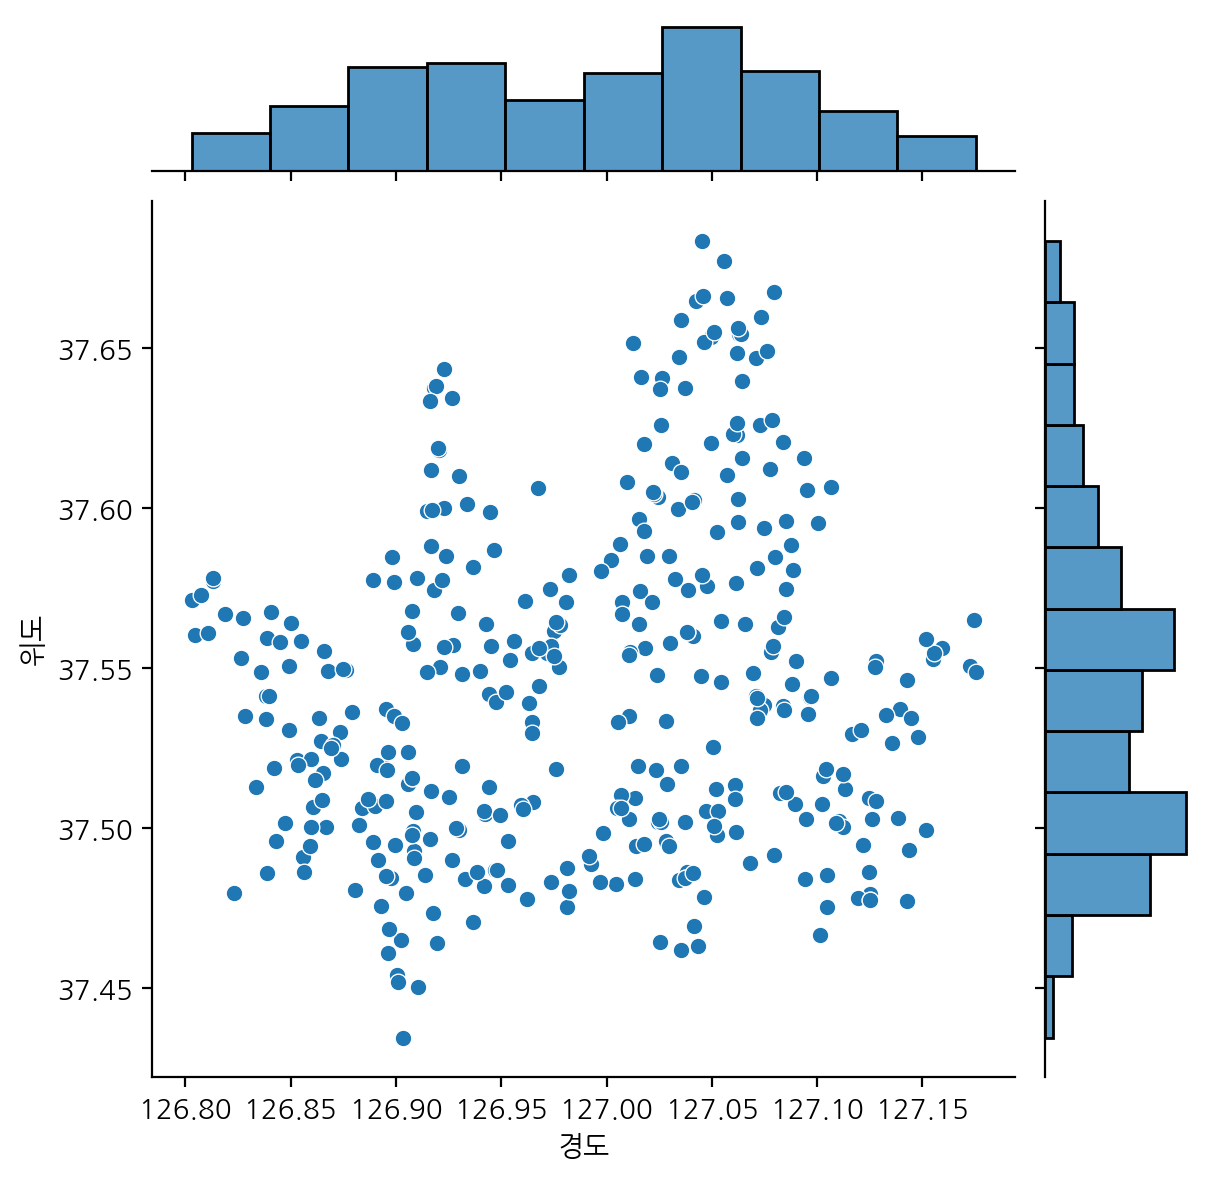

In [99]:
# jointplot() = scatter + histogram

plt.figure(figsize=(10,7))
# sns.jointplot(data=df_franchise,x='경도',y='위도',hue='브랜드명')
sns.jointplot(data=df_franchise,x='경도',y='위도')

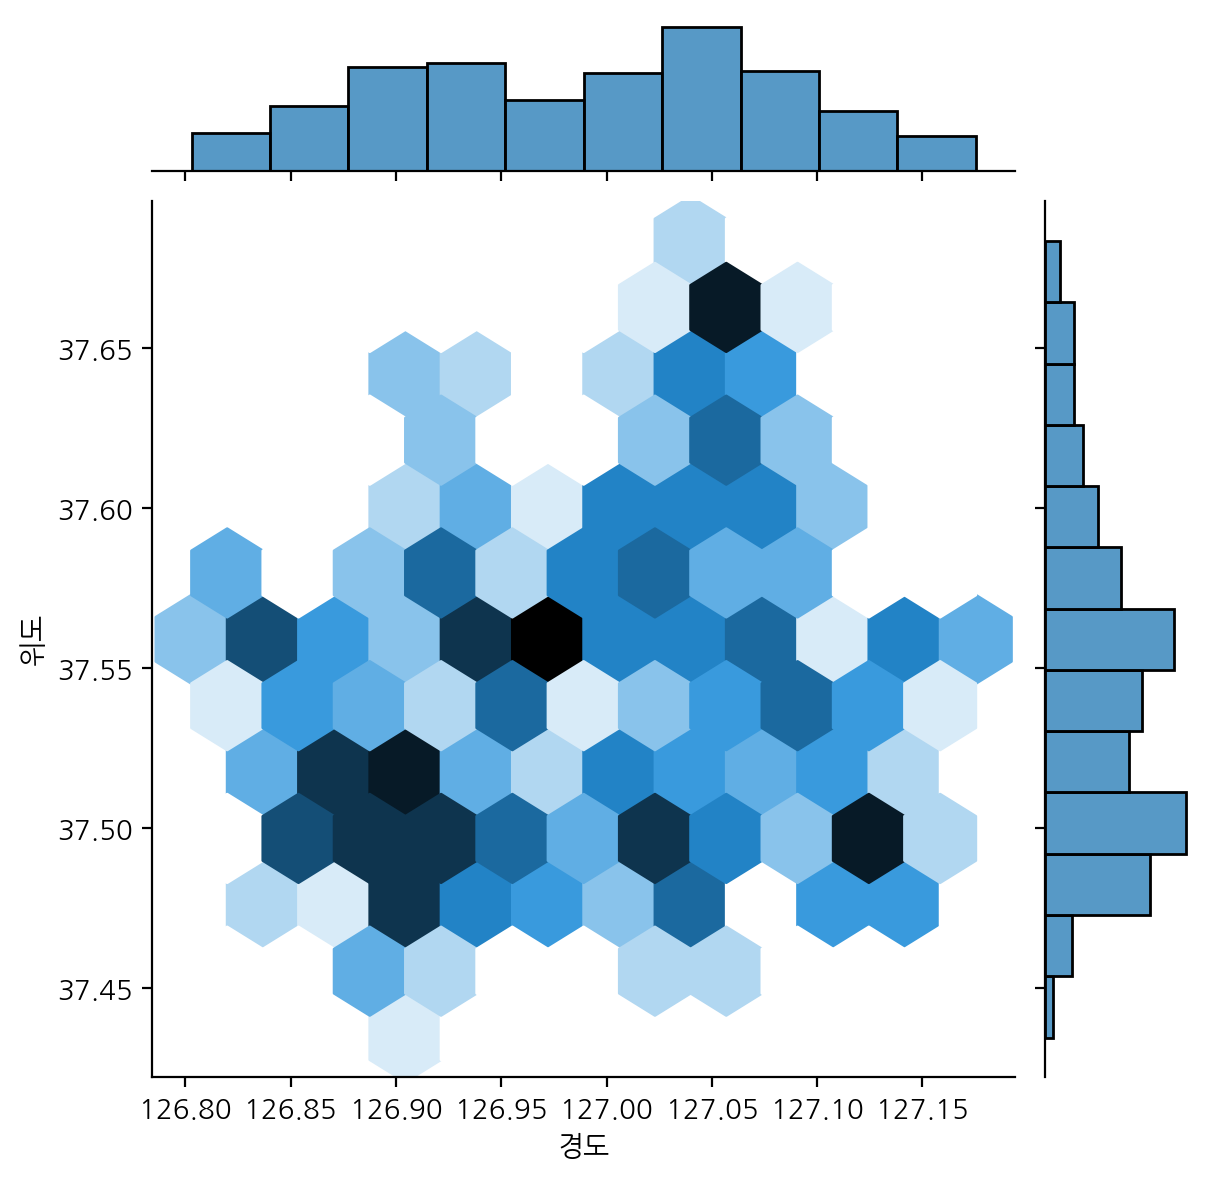

In [100]:
# jointplot(kind='hex')

sns.jointplot(data=df_franchise,x='경도',y='위도', kind='hex')

### 지도 시각화

In [101]:
import folium
import json

In [102]:
long = df_franchise['경도'].mean()
lat = df_franchise['위도'].mean()

m = folium.Map(location=(lat,long), zoom_start=11)
m

In [105]:
m = folium.Map(location=(lat,long), zoom_start=11)

for idx in df_franchise.index[:200]:
  lat = df_franchise.loc[idx,'위도']
  long = df_franchise.loc[idx,'경도']
  tooltip = df_franchise.loc[idx,'상호명'] + ' [ ' + df_franchise.loc[idx,'도로명주소'] + ' ]'

  # 마커 색상 변경
  if df_franchise.loc[idx,'브랜드명'] == '던킨':
    icon_color = 'red'
  else:
    icon_color = 'blue'

  folium.Marker((lat,long), tooltip=tooltip, icon=folium.Icon(color=icon_color)).add_to(m)
m

### 지도 MarkerCluster 로 표현

In [106]:
from folium.plugins import MarkerCluster

m = folium.Map(location=(lat,long), zoom_start=11)

marker_cluster = MarkerCluster().add_to(m)

for idx in df_franchise.index[:200]:
  lat = df_franchise.loc[idx,'위도']
  long = df_franchise.loc[idx,'경도']
  tooltip = df_franchise.loc[idx,'상호명'] + ' [ ' + df_franchise.loc[idx,'도로명주소'] + ' ]'

  # 마커 색상 변경
  if df_franchise.loc[idx,'브랜드명'] == '던킨':
    icon_color = 'red'
  else:
    icon_color = 'blue'

  folium.Marker((lat,long), tooltip=tooltip, icon=folium.Icon(color=icon_color)).add_to(marker_cluster)
m

### 커피 매장 분석 (메가 vs 빽다방)

In [107]:
df_store.head(2)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,영자's곱창,음식,한식,곱창 전골/구이,서울특별시,광진구,중곡3동,중곡동,서울특별시 광진구 면목로 172,127.082832,37.568503
1,호텔클로이,숙박,일반 숙박,여관/모텔,서울특별시,중구,광희동,광희동1가,서울특별시 중구 을지로42길 11,127.005849,37.565708


In [108]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475236 entries, 0 to 475235
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       475236 non-null  object 
 1   상권업종대분류명  475236 non-null  object 
 2   상권업종중분류명  475236 non-null  object 
 3   상권업종소분류명  475236 non-null  object 
 4   시도명       475236 non-null  object 
 5   시군구명      475236 non-null  object 
 6   행정동명      475236 non-null  object 
 7   법정동명      475236 non-null  object 
 8   도로명주소     475236 non-null  object 
 9   경도        475236 non-null  float64
 10  위도        475236 non-null  float64
dtypes: float64(2), object(9)
memory usage: 39.9+ MB


In [129]:
# 메가 와 빽다방 찾은후 df_cafe 로 만들기

df_cafe = df_store[df_store['상호명'].str.contains('메가엠지씨|MGC|빽다방')].copy()

In [130]:
df_cafe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838 entries, 1164 to 475223
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   상호명       838 non-null    object 
 1   상권업종대분류명  838 non-null    object 
 2   상권업종중분류명  838 non-null    object 
 3   상권업종소분류명  838 non-null    object 
 4   시도명       838 non-null    object 
 5   시군구명      838 non-null    object 
 6   행정동명      838 non-null    object 
 7   법정동명      838 non-null    object 
 8   도로명주소     838 non-null    object 
 9   경도        838 non-null    float64
 10  위도        838 non-null    float64
dtypes: float64(2), object(9)
memory usage: 78.6+ KB


In [131]:
# 상권업종대분류명 빈도수 확인

df_cafe['상권업종대분류명'].value_counts()

상권업종대분류명
음식    836
소매      2
Name: count, dtype: int64

In [134]:
# 소매 제거 후 df_cafe 담기

df_cafe = df_cafe[~(df_cafe['상권업종대분류명']=='소매')]

In [135]:
df_cafe['상권업종대분류명'].value_counts()

상권업종대분류명
음식    836
Name: count, dtype: int64

In [136]:
df_cafe['상권업종중분류명'].value_counts()

상권업종중분류명
비알코올     834
기타 간이      2
Name: count, dtype: int64

In [140]:
# 비알코올 에 공백이 들어가있다

df_cafe['상권업종중분류명'].unique()

array(['비알코올 ', '기타 간이'], dtype=object)

In [139]:
df_cafe[df_cafe['상권업종중분류명']=='비알코올 ']

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
1164,빽다방KBS본관점,음식,비알코올,카페,서울특별시,영등포구,여의동,여의도동,서울특별시 영등포구 의사당대로 38,126.918674,37.526017
1952,빽다방수서역점,음식,비알코올,카페,서울특별시,강남구,수서동,수서동,서울특별시 강남구 밤고개로1길 10,127.101831,37.488013
2391,빽다방화양,음식,비알코올,카페,서울특별시,성동구,성수2가3동,성수동2가,서울특별시 성동구 아차산로17길 57,127.065708,37.547455
2819,메가엠지씨커피노량진점,음식,비알코올,카페,서울특별시,동작구,노량진1동,노량진동,서울특별시 동작구 노량진로16길 14,126.943600,37.512961
2995,메가엠지씨커피배봉,음식,비알코올,카페,서울특별시,동대문구,장안2동,장안동,서울특별시 동대문구 한천로 189,127.067863,37.577964
...,...,...,...,...,...,...,...,...,...,...,...
474632,메가엠지씨커피대림역점,음식,비알코올,카페,서울특별시,영등포구,대림2동,대림동,서울특별시 영등포구 도림로 144,126.898043,37.493352
474761,메가엠지씨커피종로,음식,비알코올,카페,서울특별시,종로구,종로1.2.3.4가동,묘동,서울특별시 종로구 돈화문로 27,126.991866,37.570996
474863,메가엠지씨커피망우금란점,음식,비알코올,카페,서울특별시,중랑구,망우본동,망우동,서울특별시 중랑구 망우로 467,127.103863,37.600787
475179,빽다방빨래골,음식,비알코올,카페,서울특별시,강북구,수유1동,수유동,서울특별시 강북구 삼양로 293,127.017708,37.629745


In [141]:
# 기타 간이 제거 후 df_cafe 담기

df_cafe = df_cafe[~(df_cafe['상권업종중분류명']=='기타 간이')]

In [142]:
df_cafe.shape

(834, 11)

In [146]:
# 비알코올 공백 제거

# df_cafe['상권업종중분류명'] = df_cafe['상권업종중분류명'].str.strip()
df_cafe['상권업종중분류명'] = df_cafe['상권업종중분류명'].apply(lambda x:x.strip())

In [147]:
df_cafe['상권업종중분류명'].unique()

array(['비알코올'], dtype=object)

In [149]:
df_cafe[df_cafe['상권업종중분류명']=='비알코올'].head(2)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
1164,빽다방KBS본관점,음식,비알코올,카페,서울특별시,영등포구,여의동,여의도동,서울특별시 영등포구 의사당대로 38,126.918674,37.526017
1952,빽다방수서역점,음식,비알코올,카페,서울특별시,강남구,수서동,수서동,서울특별시 강남구 밤고개로1길 10,127.101831,37.488013


In [150]:
# 브랜드명 정리
# 메가엠지씨 => 메가 , 빽다방 => 빽

df_cafe.loc[df_cafe['상호명'].str.contains('메가엠지씨|MGC'),'브랜드명'] = '메가'
df_cafe.loc[df_cafe['상호명'].str.contains('빽다방'),'브랜드명'] = '빽'

In [153]:
df_cafe['브랜드명'].value_counts()

브랜드명
메가    546
빽     288
Name: count, dtype: int64

### 차트 시각화

<Axes: xlabel='브랜드명', ylabel='count'>

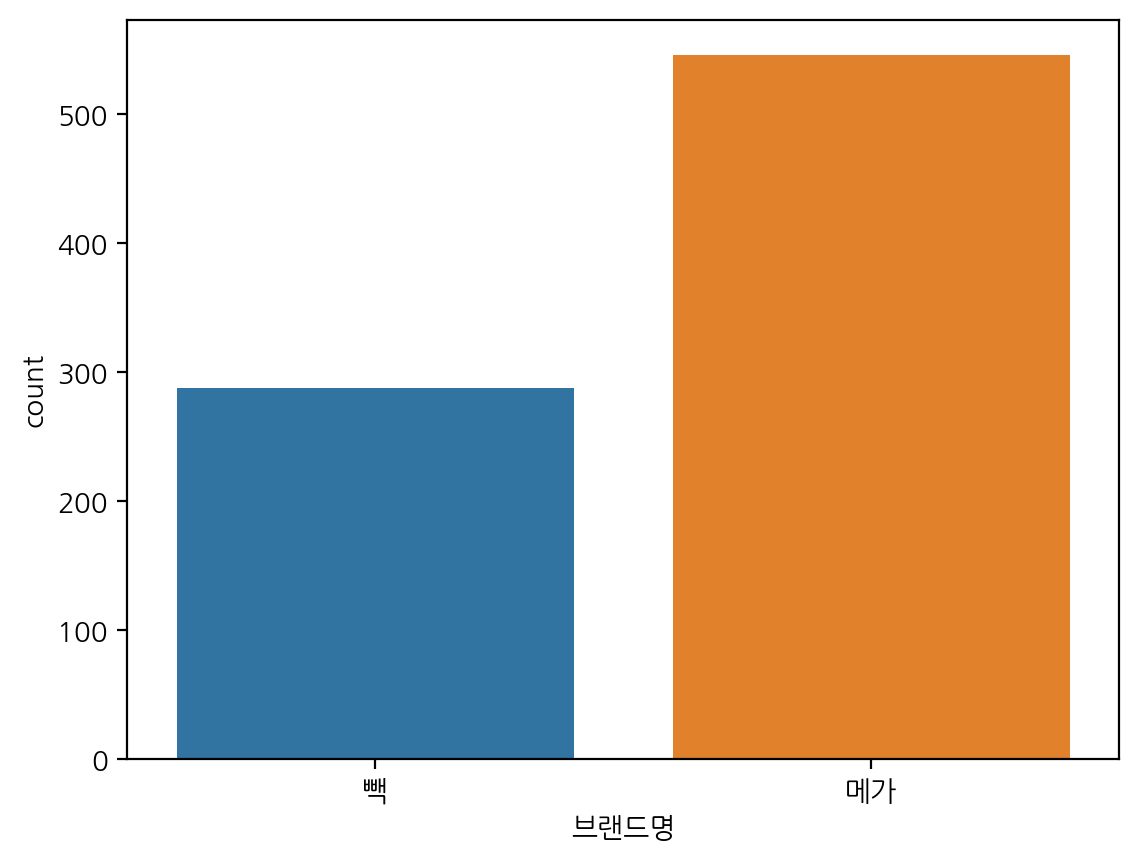

In [155]:
sns.countplot(df_cafe, x='브랜드명', hue='브랜드명')

<Axes: xlabel='시군구명', ylabel='count'>

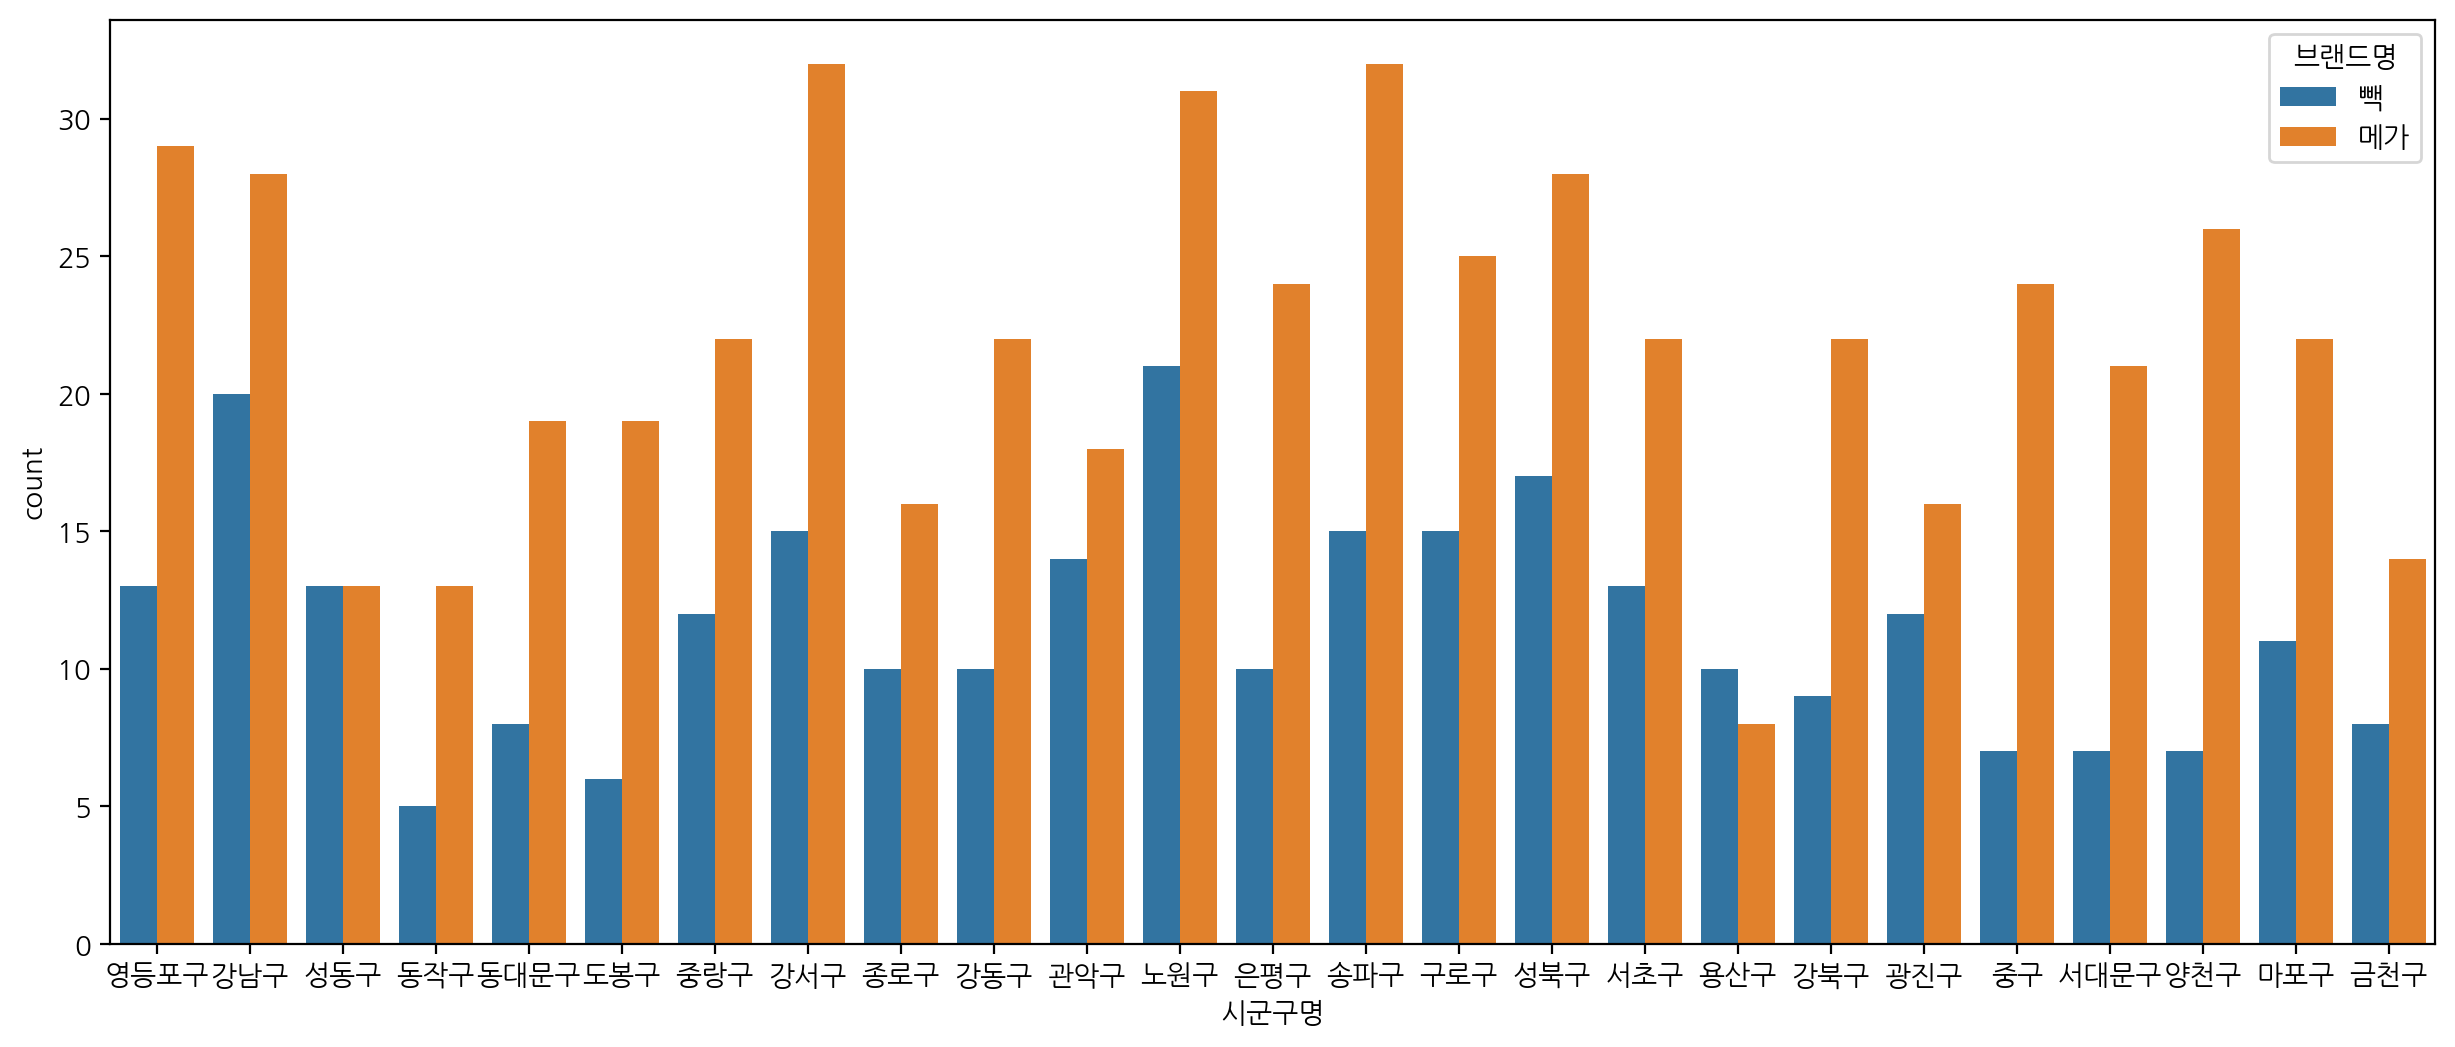

In [156]:
plt.figure(figsize=(15,6))
sns.countplot(df_cafe, x='시군구명', hue='브랜드명')

<Axes: xlabel='경도', ylabel='위도'>

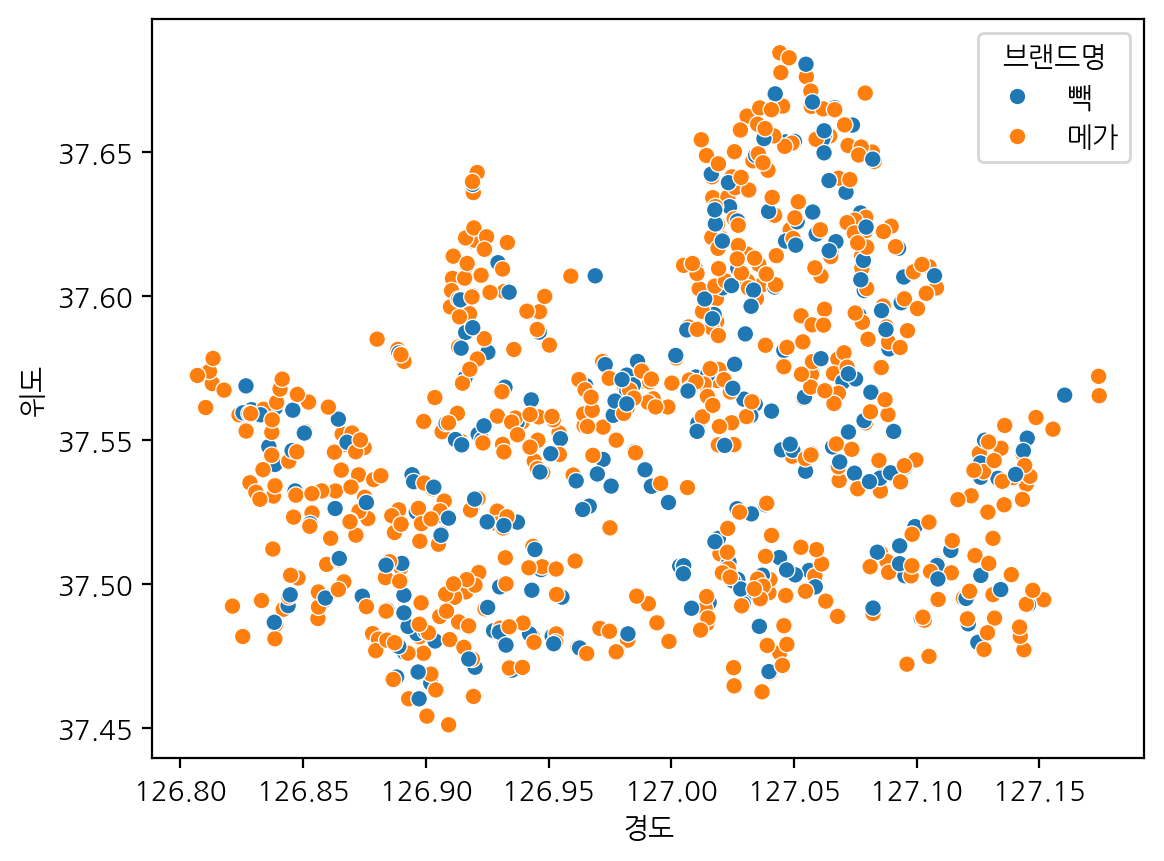

In [157]:
sns.scatterplot(df_cafe, x='경도', y='위도', hue='브랜드명')

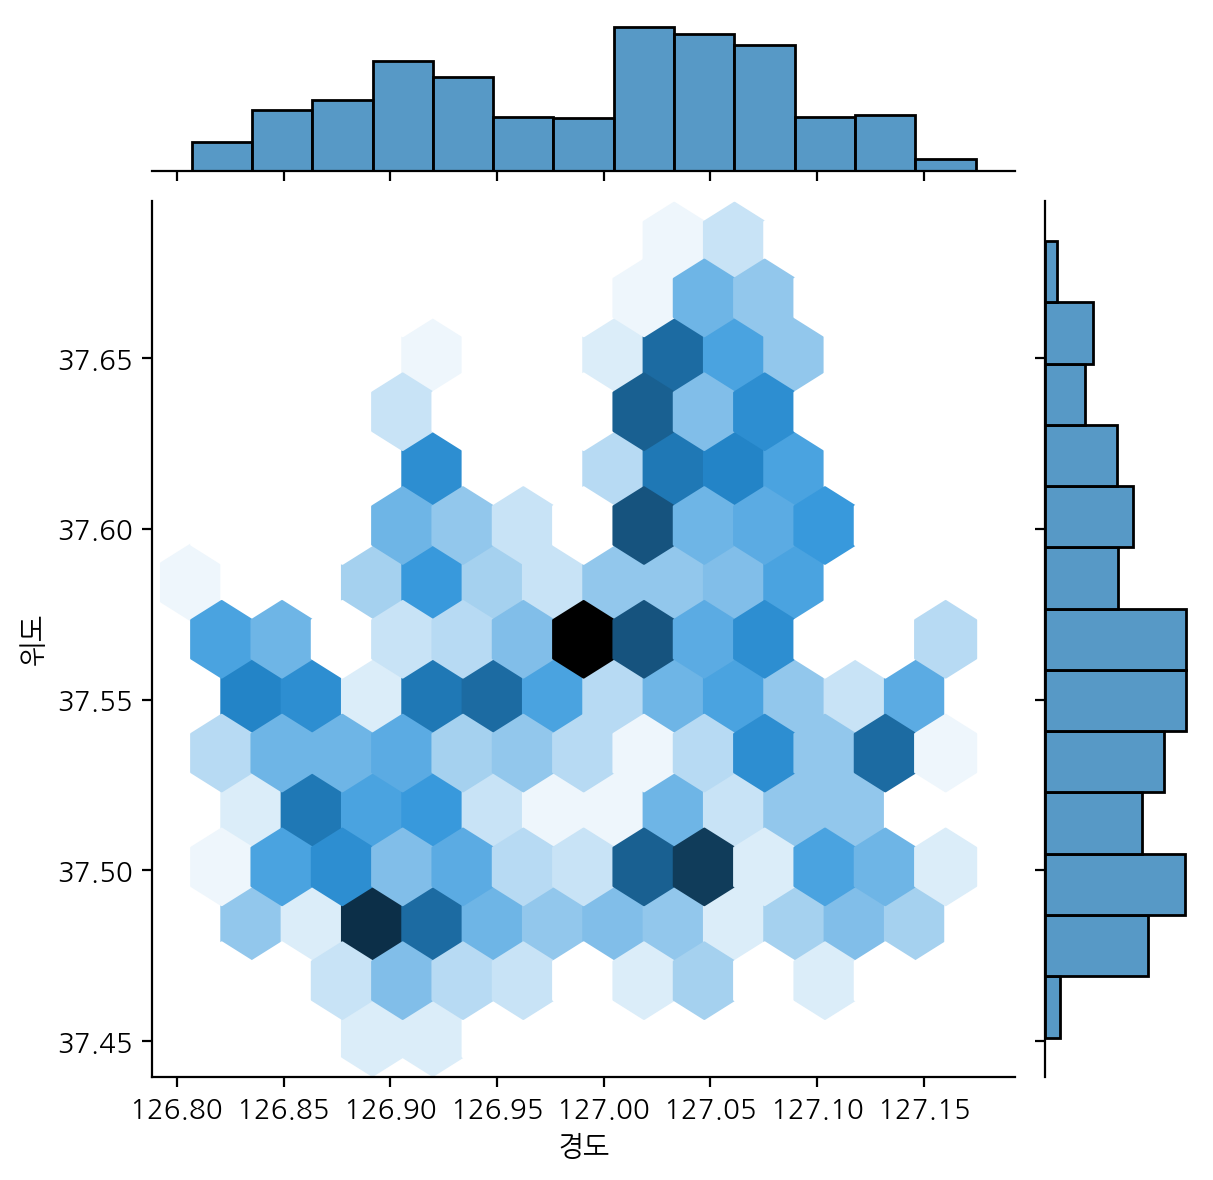

In [158]:
# jointplot : 밀집도 기반

sns.jointplot(df_cafe, x='경도', y='위도', kind='hex')

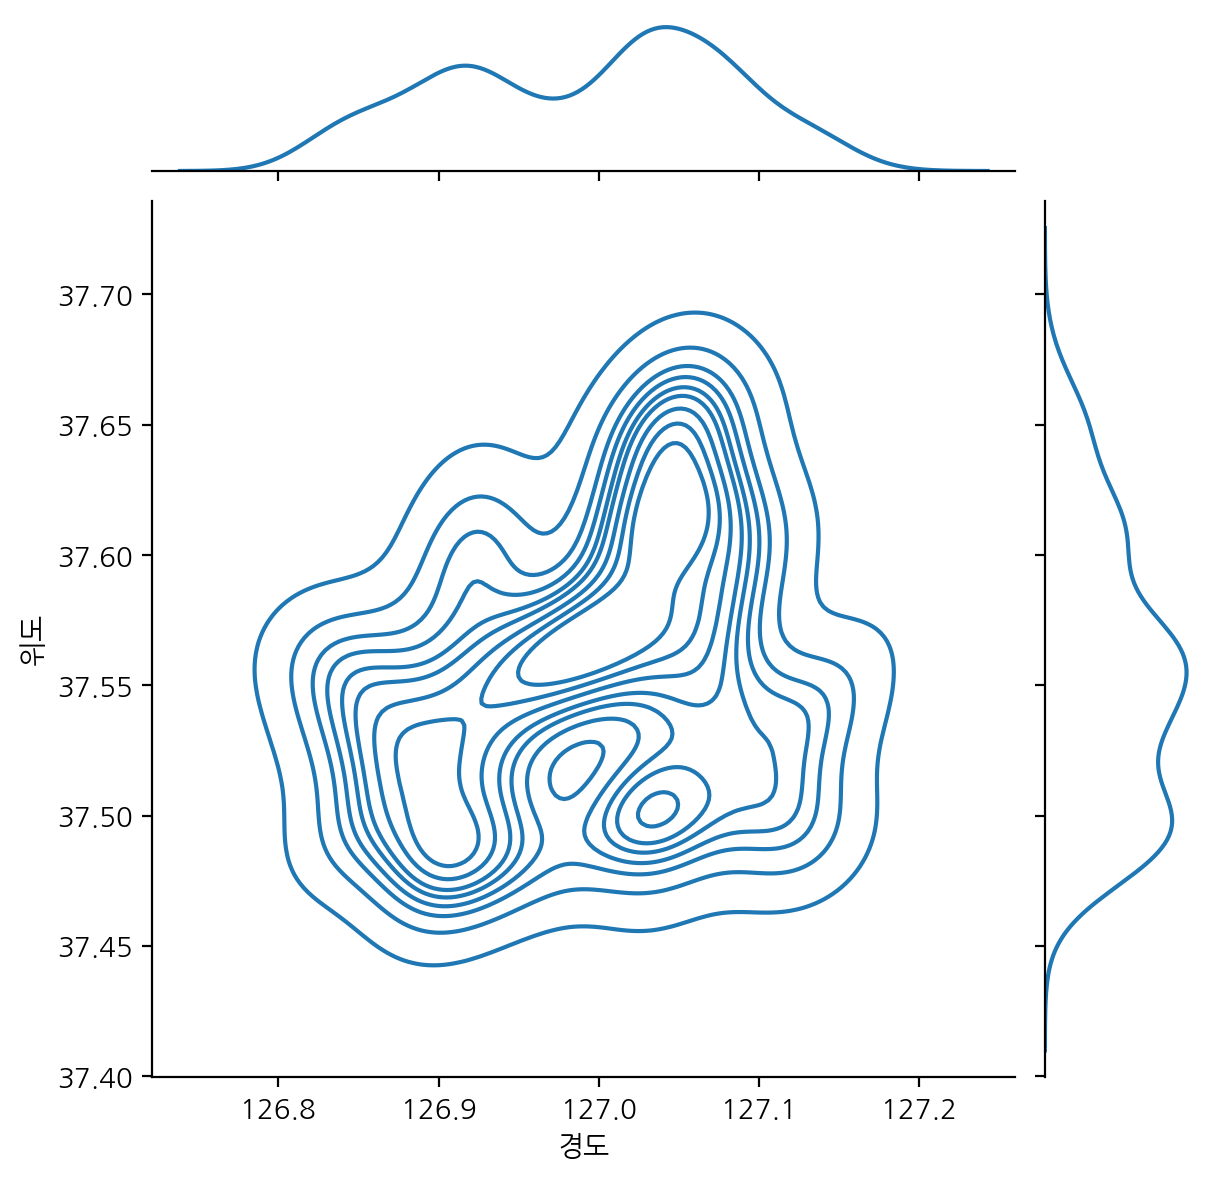

In [159]:
sns.jointplot(df_cafe, x='경도', y='위도', kind='kde')

### 멀티인덱스를 컬럼으로 변경하는 방법
- groupby() -> reset_index()
- pivot_table()
- groupby() -> unstack()

In [176]:
# 구별 브랜드별 점포수
# groupby 시군구명,브랜드명

df_cafe_group = df_cafe.groupby(['시군구명','브랜드명'])['상호명'].count()

In [180]:
# reset_index()
# 컬럼명 변경 : 시군구명=>구 , 브랜드명=>매장수

df_cafe_group = df_cafe_group.reset_index()

In [181]:
df_cafe_group.rename(columns={'시군구명':'구','상호명':'매장수'},inplace=True)

In [182]:
df_cafe_group.head()

,구,브랜드명,매장수
0,강남구,메가,28
1,강남구,빽,20
2,강동구,메가,22
3,강동구,빽,10
4,강북구,메가,22


In [186]:
# pivot_table()

df_cafe_pivot = df_cafe.pivot_table(index=['시군구명','브랜드명'], aggfunc='count', values='상호명')
df_cafe_pivot.head(2)

상호명
시군구명 브랜드명     
강남구  메가     28
     빽      20

In [193]:
# 성북구 찾기

df_cafe_group[df_cafe_group['구'] == '성북구']

,구,브랜드명,매장수
32,성북구,메가,28
33,성북구,빽,17


In [192]:
df_cafe_pivot.loc[['성북구']]

상호명
시군구명 브랜드명     
성북구  메가     28
     빽      17

- groupby 와 pivot_table 의 결과는 비슷하다
- groupby 는 결과가 시리즈 형태로 나온다
- pivot_table 은 결과가 데이타프레임으로 나온다
- 속도는 시리즈로 나오는게 좀더 빠르다

In [197]:
# unstack() : 기본은 마지막 인덱스가 컬럼으로 변경

df_cafe.groupby(['시군구명','브랜드명'])['상호명'].count().unstack()

브랜드명,메가,빽
시군구명,,
강남구,28,20
강동구,22,10
강북구,22,9
강서구,32,15
관악구,18,14
광진구,16,12
구로구,25,15
금천구,14,8
노원구,31,21


### 지도 시각화

In [198]:
import folium
import json

In [199]:
long = df_cafe['경도'].mean()
lat = df_cafe['위도'].mean()

m = folium.Map(location=(lat,long), zoom_start=11)
m

In [201]:
m = folium.Map(location=(lat,long), zoom_start=11)

for idx in df_cafe.index[:200]:
  lat = df_cafe.loc[idx,'위도']
  long = df_cafe.loc[idx,'경도']
  tooltip = df_cafe.loc[idx,'상호명'] + ' [ ' + df_cafe.loc[idx,'도로명주소'] + ' ]'

  # 마커 색상 변경
  if df_cafe.loc[idx,'브랜드명'] == '빽':
    icon_color = 'red'
  else:
    icon_color = 'blue'

  folium.Marker((lat,long), tooltip=tooltip, icon=folium.Icon(color=icon_color)).add_to(m)
m

In [203]:
from folium.plugins import MarkerCluster

m = folium.Map(location=(lat,long), zoom_start=11)

marker_cluster = MarkerCluster().add_to(m)

for idx in df_cafe.index[:200]:
  lat = df_cafe.loc[idx,'위도']
  long = df_cafe.loc[idx,'경도']
  tooltip = df_cafe.loc[idx,'상호명'] + ' [ ' + df_cafe.loc[idx,'도로명주소'] + ' ]'

  # 마커 색상 변경
  if df_cafe.loc[idx,'브랜드명'] == '빽':
    icon_color = 'red'
  else:
    icon_color = 'blue'

  folium.Marker((lat,long), tooltip=tooltip, icon=folium.Icon(color=icon_color)).add_to(marker_cluster)
m

In [204]:
# 서울 위경도 데이터 로드

geo_path = '/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/data/seoul_municipalities_geo_simple.json'

geo_str = json.load(open(geo_path,encoding='utf-8'))

In [205]:
# json 파일이라서 이런식으로 접근한다

geo_str['features'][0]['properties']['name']

'강동구'

In [206]:
df_cafe_group.head(2)

,구,브랜드명,매장수
0,강남구,메가,28
1,강남구,빽,20


In [207]:
m = folium.Map(location=(lat,long), zoom_start=11)

folium.Choropleth(
    geo_data=geo_str,
    data=df_cafe_group[df_cafe_group['브랜드명']=='메가'],
    fill_color='YlGnBu',
    columns=['구','매장수'],
    key_on='properties.name',
    legend_name='메가커피 매장 수'
).add_to(m)

m

In [209]:
m = folium.Map(location=(lat,long), zoom_start=11)

folium.Choropleth(
    geo_data=geo_str,
    data=df_cafe_group[df_cafe_group['브랜드명']=='빽'],
    fill_color='YlGnBu',
    columns=['구','매장수'],
    key_on='properties.name',
    legend_name='빽다방 매장 수'
).add_to(m)

m